# **Ensemble Models - Random Forests and Extreme Gradient Boosting (XGBoost)**

## _Machine Learning Modelling Workflow Notebook 2_

## Content:
1. Splitting the dataframe into train and test subsets;
2. Retrieving the list of classes used for training the classification models;
3. Fitting the Random Forest Model;
4. Fitting the Extreme Gradient Boosting (XGBoost) Model;
5. Getting a general feature ranking;
6. Calculating metrics for regression models;
7. Calculating metrics for classification models;
8. Making predictions with the models;
9. Calculating probabilities associated to each class;
10. Performing the SHAP feature importance analysis;
11. Time series visualization.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [1]:
import load
from idsw import *

/content/idsw/datafetch/core.py:1713: SyntaxWarning: invalid escape sequence '\p'
  engine = create_engine(r"sqlite:///C:\path\to\foo.db")
/content/idsw/datafetch/pipes.py:317: SyntaxWarning: invalid escape sequence '\s'
  txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
/content/idsw/datafetch/pipes.py:1271: SyntaxWarning: invalid escape sequence '\('
  To find a spec like "TensorSpec(shape=(None, *, *)" the Regex would be: r"TensorSpec\(shape=\(None, (\d+), (\d+)\)"
/content/idsw/modelling/core.py:2751: SyntaxWarning: invalid escape sequence '\{'
  * Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
/content/idsw/modelling/core.py:2846: SyntaxWarning: invalid escape sequence '\{'
  $\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$,
/content/idsw/modelling/deep.py:239: SyntaxWarning: invalid escape sequence '\%'
  print("In this example

Package copied to the working directory.
To import its whole content, run:

    from idsw import *



/content/idsw/etl/procdiagnosis.py:1250: SyntaxWarning: invalid escape sequence '\m'
  string_for_title = " - $\mu = %.2f$, $\sigma = %.2f$" %(stats_dict['mu'], stats_dict['sigma'])


## **Call the functions**

### **Importing the dataset**

In [2]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt),
## JSON, txt, or CSV (comma separated values) files. Tables in webpages or html files can also be read.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset4.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or,
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
# Also, html files and webpages may be also read.

# You may input the path for an HTML file containing a table to be read; or
# a string containing the address for a webpage containing the table. The address must start
# with www or htpp. If a website is input, the full address can be input as FILE_DIRECTORY_PATH
# or as FILE_NAME_WITH_EXTENSION.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True
# if you want to read a file with txt extension containing a text formatted as JSON
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’,
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’,
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}


HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = ","
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " "
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.

SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep.
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Dataset extracted from dataset4.csv. Check the 10 first rows of this dataframe:



,timestamp,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,f4_cos,f5_sin,...,Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc,Cultivar_MONSOY 8330I2X_OneHotEnc,Cultivar_NK 7777 IPRO_OneHotEnc,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,NLP_log,NGL_log,NS_log,GY_log
0,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.074142,4.587006,0.593327,1.648659,8.081110
1,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.396915,4.593098,0.559616,2.001480,8.080544
2,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,3.955082,4.171306,0.832909,1.974081,8.199865
3,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,1.0,0.0,0.0,3.988984,4.409155,0.982078,2.104134,8.324278
4,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,1.0,0.0,0.0,0.0,0.0,4.010963,3.891820,0.494696,1.280934,8.141289
5,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.104295,4.117410,0.797507,1.791759,8.140525
6,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.265493,4.290459,0.717840,1.856298,8.162262
7,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,3.985273,3.891820,0.978326,1.648659,7.988859
8,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.461300,3.784190,0.693147,1.568616,8.382154
9,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.021774,3.793239,0.688135,1.029619,8.220513


In [3]:
dataset.columns

Index(['timestamp', 'f1_sin', 'f1_cos', 'f2_sin', 'f2_cos', 'f3_sin', 'f3_cos',
       'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos', 'f6_sin', 'f6_cos', 'f7_sin',
       'f7_cos', 'f8_sin', 'f8_cos', 'cluster',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FTR 3179 IPRO_OneHotEnc',
       'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc',
       'Cultivar_MONSOY 8330I2X_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
       'Cultivar_SUZY IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc',
       'PH_log', 'NLP_log', 'NGL_log', 'NS_log', 'GY_log'],
      dtype='object')

### **Separating and preparing features and responses tensors**

In [4]:
DATASET = dataset  #Alternatively: object containing the dataset to be analyzed

FEATURES_COLUMNS = ['f1_sin', 'f1_cos', 'f2_sin',
        'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
        'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos', 'cluster',
        'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc', 'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
        'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc', 'Cultivar_FORTALECE L090183 RR_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneHotEnc',
        'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc', 'Cultivar_MONSOY 8330I2X_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
        'Cultivar_SUZY IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc',
        'PH_log', 'NLP_log', 'NGL_log', 'NS_log']
# FEATURES_COLUMNS: list of strings or string containing the names of columns
# with predictive variables in the original dataframe.
# Example: FEATURES_COLUMNS = ['col1', 'col2']; FEATURES_COLUMNS = 'predictor';
# FEATURES_COLUMNS = ['predictor'].

RESPONSE_COLUMNS = 'GY_log'
# RESPONSE_COLUMNS: list of strings or string containing the names of columns
# with response variables in the original dataframe.
# Example: RESPONSE_COLUMNS= ['col3', 'col4']; RESPONSE_COLUMNS = 'response';
# RESPONSE_COLUMNS = ['response']

# Arrays or tensors containing features and responses returned as X and y, respectively.
# Mapping dictionary correlating the position in array or tensor to the original column name
# returned as column_map_dict.
# Simply modify these objects on the left of equality:
X, y, column_map_dict = separate_and_prepare_features_and_responses (df = DATASET, features_columns = FEATURES_COLUMNS, response_columns = RESPONSE_COLUMNS)

Check the 5 first elements from the tensors or arrays obtained:

Features tensor or array:

tf.Tensor(
[[-7.08621877e-01  7.05588432e-01 -8.83307734e-01  4.68793609e-01
  -9.25106016e-01  3.79708914e-01 -9.99990798e-01 -4.28992938e-03
  -7.02542001e-01 -7.11642281e-01  6.96410409e-01  7.17643743e-01
   9.99549146e-01  3.00250846e-02  4.28862681e-02 -9.99079961e-01
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.07414185e+00  4.58700622e+00  5.93326845e-01
   1.64865863e+00]
 [-7.08621877e-01  7.05588432e-01 -8.83307734e-01  4.68793609e-01
  -9.25106016e-01  3.79708914e-01 -9.99990798e-01 -4.28992938e-03
  -7.02542001e-01 -7.11642281e-01  6.96410409e-01  7.17643743e-01
   9.99549146e-01  3.00250846e-02  4.28862681e-02 -9.99079961e-01
   3.30000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0

### **Splitting features and responses into train and test tensors**

In [5]:
X_tensor = X
# X_df = tensor or array of predictive variables. Alternatively, modify X, not X_tensor.
Y_tensor = y
# Y = tensor or array of response variables. Alternatively, modify y, not Y_tensor.

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 75
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 0
# If you want to use cross-validation, separate a percent of the training data for validation.
# Declare this percent as PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION (float from 0 to 100).

# Subset and series destined to training, testing and/or validation returned in the dictionary split_dictionary;
# Simply modify this object on the left of equality:
split_dictionary = split_data_into_train_and_test (X = X_tensor, y = Y_tensor, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING, percent_of_training_data_used_for_model_validation = PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION)

X and y successfully splitted into train: X_train, y_train (75.0% of data); test: X_test, y_test (25.0% of data); and validation subsets: X_valid, y_valid (0.0% of data).


10 first rows from subset X_train:

tf.Tensor(
[[-4.50719761e-01  8.92665501e-01 -5.99527638e-01  8.00354054e-01
  -6.45255154e-01  7.63967137e-01 -8.04683963e-01  5.93703393e-01
  -9.85907465e-01  1.67291573e-01  1.31029849e-01 -9.91378424e-01
  -2.59800330e-01  9.65662358e-01 -7.32825897e-02 -9.97311216e-01
   3.30000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.43556740e+00  4.55807858e+00  5.30628251e-01
   1.91692261e+00]
 [-7.08621877e-01  7.05588432e-01 -8.83307734e-01  4.68793609e-01
  -9.25106016e-01  3.79708914e-01 -9.99990798e-01 -4.28992938e-03
  -7.02542001e-01 -7.11642281e-01  6.96410409e-01  7.17643743e-01
   9.99549146e-01  3.00250846e-02  

### **Fitting the Extreme Gradient Boosting (XGBoost) Model**
- Boosting ensemble of decision trees.
- Each new tree is trained preferentially with data for which the previous trees had difficulty on making good predictions (i.e., these data receives higher weights of importance).
- This algorithm usally performs better than Random Forests.

Metrics for training:

Mean squared error (MSE) = 5.701617e-06
Root mean squared error (RMSE) = 2.387806e-03
Mean absolute error (MAE) = 5.970619e-04
Mean absolute percentage error (MAPE) = 2.015428e+00
Coefficient of linear correlation R² = 9.997531e-01
Adjusted coefficient of correlation R²-adj = 9.997135e-01
Explained variance = 9.997531e-01


Metrics for testing:

Mean squared error (MSE) = 1.746083e-02
Root mean squared error (RMSE) = 1.321394e-01
Mean absolute error (MAE) = 1.059189e-01
Mean absolute percentage error (MAPE) = 1.858218e+00
Coefficient of linear correlation R² = 3.030722e-01
Adjusted coefficient of correlation R²-adj = -1.968977e-01
Explained variance = 3.072688e-01


Feature importance ranking - until 20 most important features:



,predictive_features,feature_importances,abs_feature_importances
0,Cultivar_96R29 IPRO_OneHotEnc,0.263262,0.263262
1,Cultivar_FTR 3179 IPRO_OneHotEnc,0.209215,0.209215
2,Cultivar_82I78RSF IPRO_OneHotEnc,0.112379,0.112379
3,f6_sin,0.054927,0.054927
4,Cultivar_MONSOY 8330I2X_OneHotEnc,0.037005,0.037005
5,f6_cos,0.033511,0.033511
6,Cultivar_FORTALECE L090183 RR_OneHotEnc,0.030423,0.030423
7,f7_sin,0.030049,0.030049
8,NS_log,0.027447,0.027447
9,f8_cos,0.021554,0.021554




Feature relative importance bar chart:



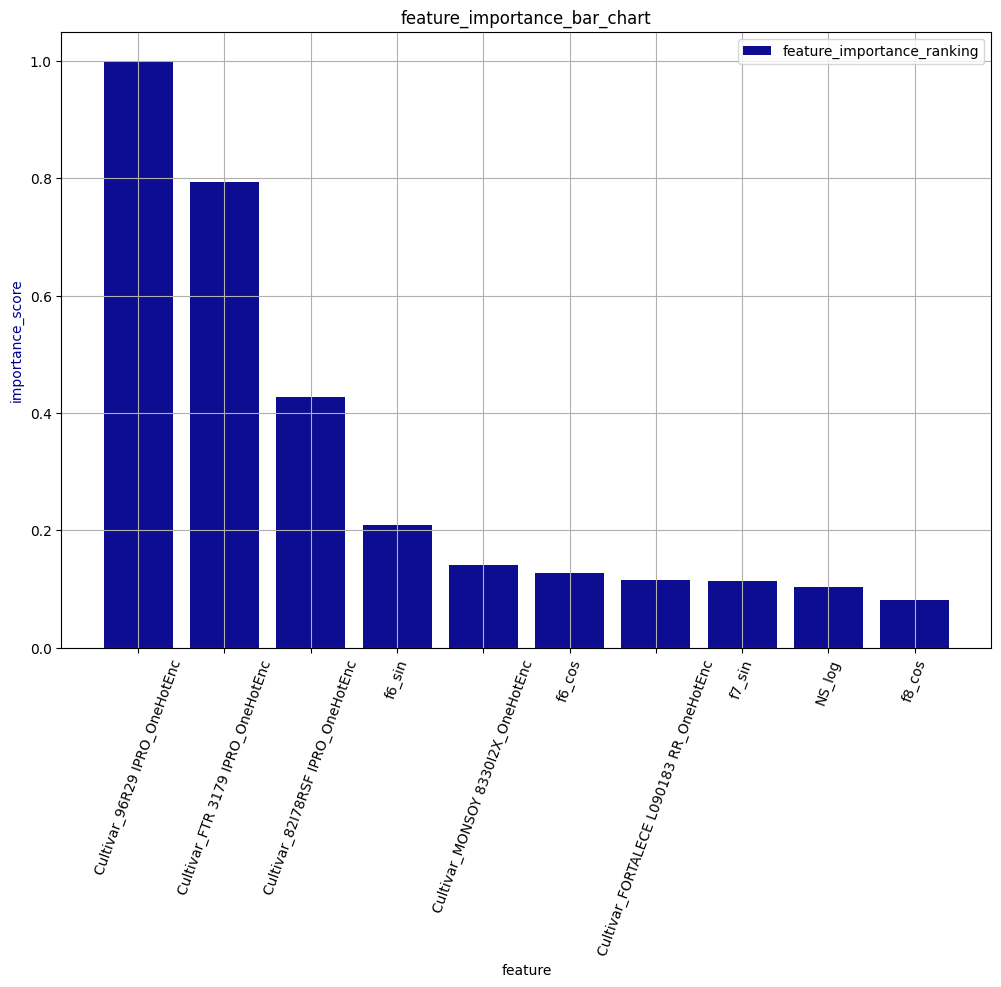



To predict the model output y_pred for a dataframe X, declare: y_pred = xgb_model.predict(X)

For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):
X_train = np.reshape(np.array(X_train), (-1, 1))


In [6]:
# split_dictionary.keys() == dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'X_valid', 'y_valid'])

X_TRAIN = split_dictionary['X_train']
# X_TRAIN = tensor of predictive variables.
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = split_dictionary['y_train']
# Y_TRAIN = tensor of response variables.
# Alternatively, modify y_train, not Y_TRAIN

TYPE_OF_PROBLEM = "regression"
# TYPE_OF_PROBLEM = 'regression'; or TYPE_OF_PROBLEM = 'classification'
# The default is 'regression', which will be used if no type is
# provided.

NUMBER_OF_TREES = 128
# NUMBER_OF_TREES = 128 (integer) - number of gradient boosted trees.
# Equivalent to number of boosting rounds.
# it is the n_estimators parameter of the model.
# Usually, a number from 64 to 128 is used.

MAX_TREE_DEPTH = 20
# MAX_TREE_DEPTH = 20 - integer representing the maximum depth
# permitted for the trees (base learners).

PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE = 75
# PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE = 75 (float or None).
# If this value is set, it defines the percent of data that will be ramdonly
# selected for training the models.
# e.g. PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE = 80 uses 80% of the data. If None,
# it uses the whole training set (100%)

# When subsampling, training data is divided into several subsets, and these
# subsets are used for separately training the model.
# Importantly: random forest and XGBoost combine several decision trees, by randomnly selecting
# variables for making the tree leafs and nodes; and ramdonly setting the depth of
# the trees. The use of this strategy guarantees that the data used for the construction
# of the trees is randomly selected.
# If not using, the model will be highly susceptive of overfitting due to the use of
# the whole dataset. Also, the calculated metrics will be over estimated.
# This phenomenon is characteristic from ensemble algorithms like random forests, and
# XGBoost, and is not usually observed on linear regressions.

# Tensors of data separated for model testing:
X_TEST = split_dictionary['X_test']
Y_TEST = split_dictionary['y_test']
#X_TEST = split_dictionary['X_test']
#Y_TEST = split_dictionary['y_test']

# Tensors of data separated for model validation:
X_VALID = None
Y_VALID = None
#X_VALID = split_dictionary['X_valid']
#Y_VALID = split_dictionary['y_valid']

COLUMN_MAP_DICT = column_map_dict
#COLUMN_MAP_DICT = None
# COLUMN_MAP_DICT: Mapping dictionary correlating the position in array or tensor to the original
# column name.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"
EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'feature_importance_ranking.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Model object returned as xgb_model;
# Summary dictionary storing the feature ranking importance dataframe; the metrics and the classes
# count and possible values (for a classification problem) returned as summary_dict;
# Simply modify these objects on the left of equality:
xgb_model, summary_dict = xgboost_model (X_train = X_TRAIN, y_train = Y_TRAIN, type_of_problem = TYPE_OF_PROBLEM, number_of_trees = NUMBER_OF_TREES, max_tree_depth = MAX_TREE_DEPTH, percent_of_training_set_to_subsample = PERCENT_OF_TRAINING_SET_TO_SUBSAMPLE, X_test = X_TEST, y_test = Y_TEST, X_valid = X_VALID, y_valid = Y_VALID, column_map_dict = COLUMN_MAP_DICT, orientation = ORIENTATION, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [7]:
summary_dict.keys()

dict_keys(['metrics_dict', 'feature_importance_df'])

In [8]:
feature_importance_xgb = summary_dict['feature_importance_df']
feature_importance_xgb

,predictive_features,feature_importances,abs_feature_importances
0,Cultivar_96R29 IPRO_OneHotEnc,0.263262,0.263262
1,Cultivar_FTR 3179 IPRO_OneHotEnc,0.209215,0.209215
2,Cultivar_82I78RSF IPRO_OneHotEnc,0.112379,0.112379
3,f6_sin,0.054927,0.054927
4,Cultivar_MONSOY 8330I2X_OneHotEnc,0.037005,0.037005
5,f6_cos,0.033511,0.033511
6,Cultivar_FORTALECE L090183 RR_OneHotEnc,0.030423,0.030423
7,f7_sin,0.030049,0.030049
8,NS_log,0.027447,0.027447
9,f8_cos,0.021554,0.021554


### **Making predictions with the models**

In [9]:
MODEL_OBJECT = xgb_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_tensor = X
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'

# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values).
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None,
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

FUNCTION_USED_FOR_FITTING_DL_MODEL = 'get_deep_learning_tf_model'
# FUNCTION_USED_FOR_FITTING_DL_MODEL: the function you used for obtaining the deep learning model.
# Example: 'get_deep_learning_tf_model' or 'get_siamese_networks_model'

ARCHITECTURE = None
# ARCHITECTURE: some models require inputs in a proper format. Declare here if you are using
# one of these architectures. Example: ARCHITECTURE = 'cnn_lstm' from class tf_models require
# a special reshape before getting predictions. You can keep None or put the name of the
# architecture, if no special reshape is needed.

### ATTENTION: ALL MODELS WITH LSTM, CNN or OTHER SPECIAL LAYERS REQUIRE THIS ARGUMENT TO BE
# DECLARED

LIST_OF_RESPONSES = RESPONSE_COLUMNS
# You may declare the list RESPONSE_COLUMNS previously used for separating into features and responses tensors.
# LIST_OF_RESPONSES = []. This parameter is obbligatory for multi-response models, such as the ones obtained from
# function 'get_siamese_networks_model'. It must contain a list with the same order of the output responses.
# Example: suppose your siamese model outputs 4 responses: 'temperature', 'pressure', 'flow_rate', and 'ph', in
# this order. The list of responses must be declared as:
# LIST_OF_RESPONSES = ['temperature', 'pressure', 'flow_rate', 'ph']
# tuples and numpy arrays are also acceptable: LIST_OF_RESPONSES = ('temperature', 'pressure', 'flow_rate', 'ph')
# Attention: the number of responses must be exactly the number of elements in list_of_responses, or an error will
# be raised.


# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output = make_model_predictions (model_object = MODEL_OBJECT, X = X_tensor, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, column_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX, function_used_for_fitting_dl_model = FUNCTION_USED_FOR_FITTING_DL_MODEL, architecture = ARCHITECTURE, list_of_responses = LIST_OF_RESPONSES)

Predicting 6 responses for a total of 320 entries.

Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == 'deep_learning'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.

The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.

The prediction was added as the new columns ['y_pred_GY_log'] of the dataframe, and this dataframe was returned. Check its 10 first rows:



,timestamp,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,f4_cos,f5_sin,...,Cultivar_MONSOY 8330I2X_OneHotEnc,Cultivar_NK 7777 IPRO_OneHotEnc,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,NLP_log,NGL_log,NS_log,GY_log,y_pred_GY_log
0,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.074142,4.587006,0.593327,1.648659,8.081110,8.081246
1,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.396915,4.593098,0.559616,2.001480,8.080544,8.080611
2,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,3.955082,4.171306,0.832909,1.974081,8.199865,8.199996
3,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,1.0,0.0,0.0,3.988984,4.409155,0.982078,2.104134,8.324278,8.323807
4,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.010963,3.891820,0.494696,1.280934,8.141289,8.141252
5,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.104295,4.117410,0.797507,1.791759,8.140525,8.140229
6,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.265493,4.290459,0.717840,1.856298,8.162262,8.191638
7,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,3.985273,3.891820,0.978326,1.648659,7.988859,7.988820
8,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.461300,3.784190,0.693147,1.568616,8.382154,8.382440
9,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.00429,-0.702542,...,0.0,0.0,0.0,0.0,4.021774,3.793239,0.688135,1.029619,8.220513,8.220535


### **Performing the SHAP feature importance analysis**
- SHAP was developed by a mathematician from Washington University.
- It combines the obtained machine learning model with Game Theory algorithms to analyze the relative importance of each variable, as well as the **interactions between variables**.
- SHAP returns us a SHAP value that represents the relative importance.

Randomly sampling 40 points from the dataset to perform SHAP analysis.
If the kernel takes too long, cancel the application and reduce the integer value input as 'total_of_shap_points'. On the other hand, if it is possible, increase the value to obtain higher precision on the analysis.
Analyzing tree-based Scikit-learn or XGBoost model.


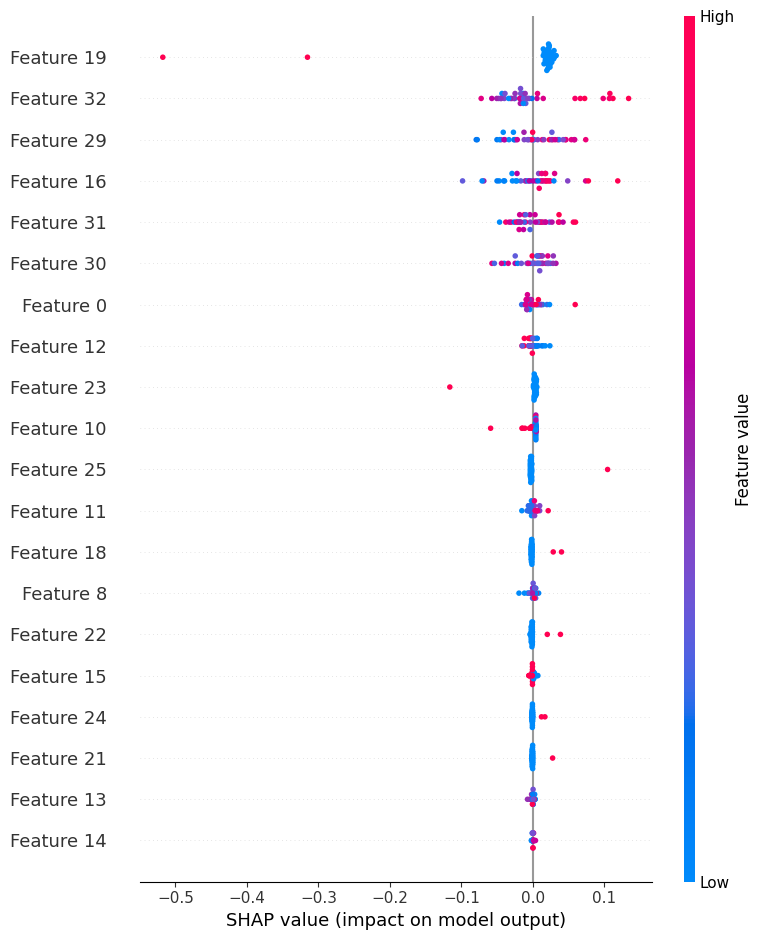



Dictionary with SHAP explainer and SHAP values returned as 'shap_dict'.


SHAP Interpretation:
SHAP returns us a SHAP value that represents the relative importance.
The features are displayed in order of importance, from the most important (top of the plot) to the less important (bottom of the plot).
A feature which is shown on the right side of the plot results in positive impact on the model, whereas a feature on the left results into a negative impact in the response.
The relative impact is shown by the color scale: a tone closer to red indicates a higher impact, whereas the proximity to blue indicates low relative impact.


In [10]:
MODEL_OBJECT = xgb_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = xgb_model

X_TRAIN = split_dictionary['X_train']
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN

MODEL_TYPE = 'tree'
# MODEL_TYPE = 'general' for the general case, including artificial neural networks.
# MODEL_TYPE = 'linear' for Sklearn linear models (OLS, Ridge, Lasso, ElasticNet,
# Logistic Regression).
# MODEL_TYPE = 'tree' for tree-based models (Random Forest and XGBoost).
# MODEL_TYPE = 'deep' for Deep Learning TensorFlow model.
# Actually, any string different from 'linear', 'tree', or 'deep' (including blank string)
# will apply the general case.

TOTAL_OF_SHAP_POINTS = 40
# TOTAL_OF_SHAP_POINTS (integer): number of points from the
# subset X_train that will be randomly selected for the SHAP
# analysis. If the kernel is taking too long, reduce this value.


# Dictionary containing calculated metrics returned as shap_dict;
# Simply modify this object on the left of equality:
shap_dict = shap_feature_analysis (model_object = MODEL_OBJECT, X_train = X_TRAIN, model_type = MODEL_TYPE, total_of_shap_points = TOTAL_OF_SHAP_POINTS)

In [12]:
d = dataset.copy(deep = True)
d = d.drop(columns = ['timestamp', 'GY_log'])
for i, column in enumerate(d.columns):
  print(f"Feature {i}: {column}")

Feature 0: f1_sin
Feature 1: f1_cos
Feature 2: f2_sin
Feature 3: f2_cos
Feature 4: f3_sin
Feature 5: f3_cos
Feature 6: f4_sin
Feature 7: f4_cos
Feature 8: f5_sin
Feature 9: f5_cos
Feature 10: f6_sin
Feature 11: f6_cos
Feature 12: f7_sin
Feature 13: f7_cos
Feature 14: f8_sin
Feature 15: f8_cos
Feature 16: cluster
Feature 17: Cultivar_82I78RSF IPRO_OneHotEnc
Feature 18: Cultivar_83IX84RSF I2X_OneHotEnc
Feature 19: Cultivar_96R29 IPRO_OneHotEnc
Feature 20: Cultivar_97Y97 IPRO_OneHotEnc
Feature 21: Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc
Feature 22: Cultivar_FORTALECE L090183 RR_OneHotEnc
Feature 23: Cultivar_FTR 3179 IPRO_OneHotEnc
Feature 24: Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc
Feature 25: Cultivar_MONSOY 8330I2X_OneHotEnc
Feature 26: Cultivar_NK 7777 IPRO_OneHotEnc
Feature 27: Cultivar_SUZY IPRO_OneHotEnc
Feature 28: Cultivar_TMG 22X83I2X_OneHotEnc
Feature 29: PH_log
Feature 30: NLP_log
Feature 31: NGL_log
Feature 32: NS_log


### **Visualizing time series**

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



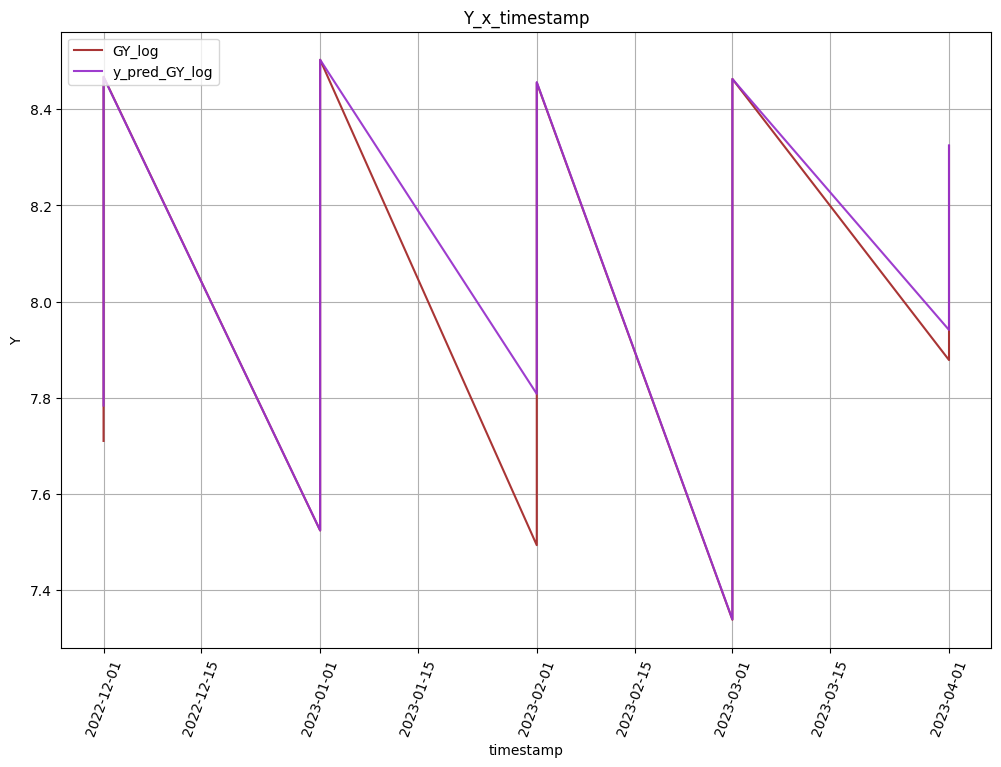

In [19]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['GY_log'], 'lab': 'GY_log'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['y_pred_GY_log'], 'lab': 'y_pred_GY_log'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# **CHECK FREQUENCY VARIABLES - NOT CHARACTERIZED YET**

In [23]:
dataset.columns

Index(['timestamp', 'f1_sin', 'f1_cos', 'f2_sin', 'f2_cos', 'f3_sin', 'f3_cos',
       'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos', 'f6_sin', 'f6_cos', 'f7_sin',
       'f7_cos', 'f8_sin', 'f8_cos', 'cluster',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FTR 3179 IPRO_OneHotEnc',
       'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc',
       'Cultivar_MONSOY 8330I2X_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
       'Cultivar_SUZY IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc',
       'PH_log', 'NLP_log', 'NGL_log', 'NS_log', 'GY_log'],
      dtype='object')

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



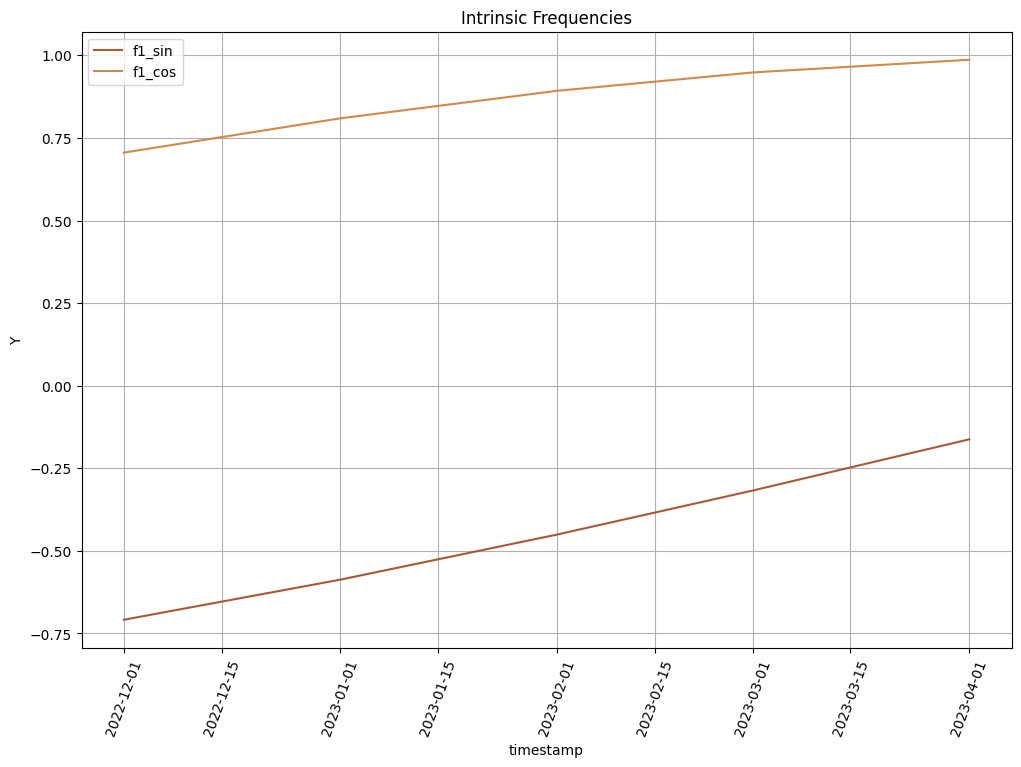

In [26]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f1_sin'], 'lab': 'f1_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f1_cos'], 'lab': 'f1_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



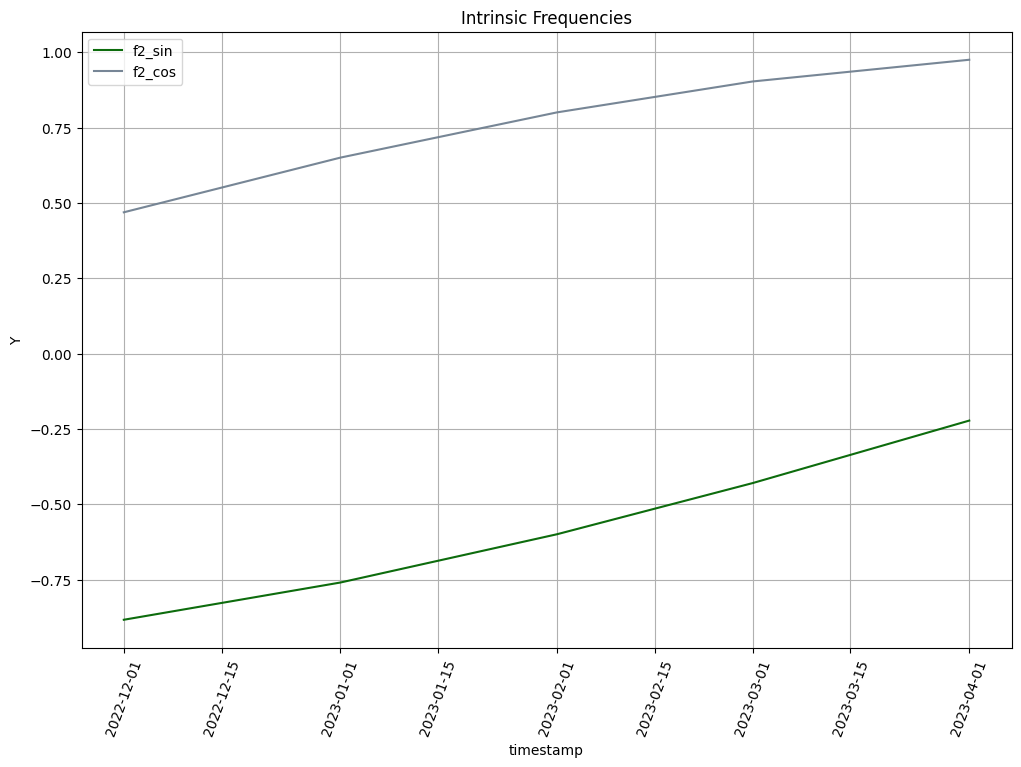

In [27]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f2_sin'], 'lab': 'f2_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f2_cos'], 'lab': 'f2_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



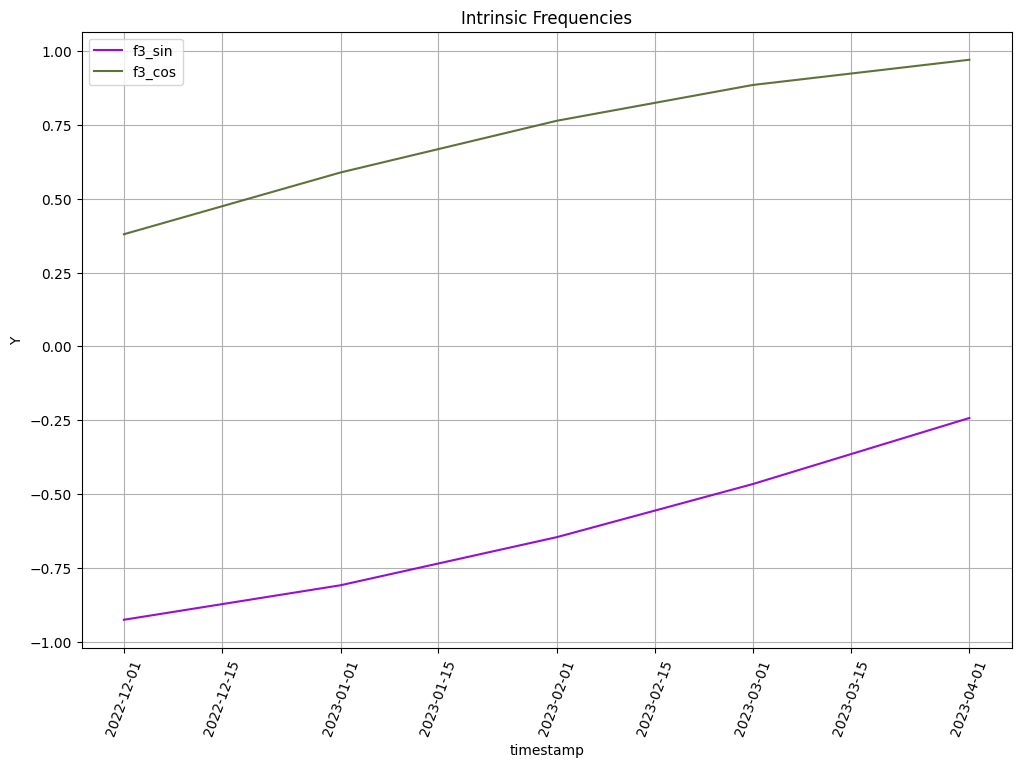

In [28]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f3_sin'], 'lab': 'f3_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f3_cos'], 'lab': 'f3_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



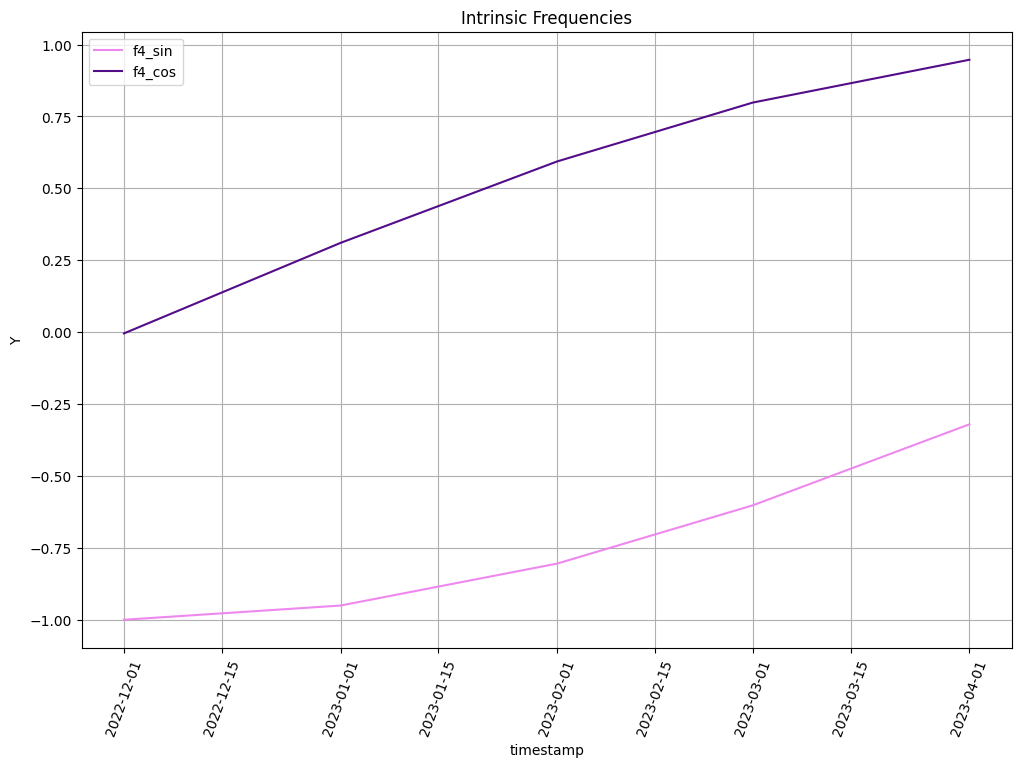

In [35]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f4_sin'], 'lab': 'f4_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f4_cos'], 'lab': 'f4_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



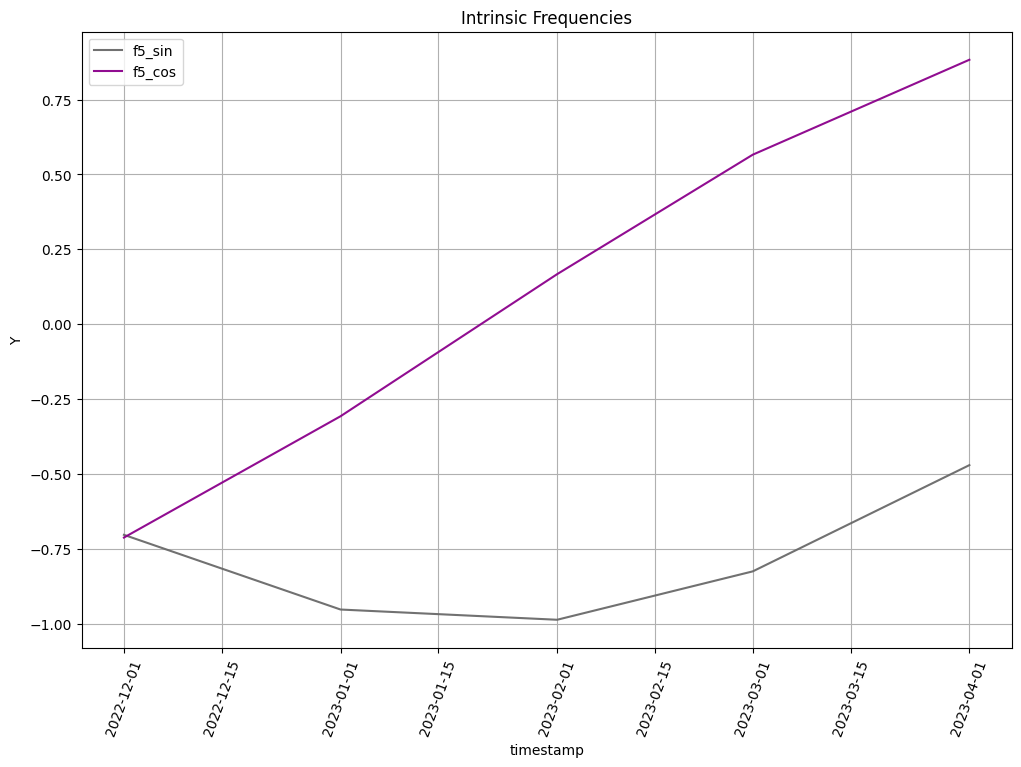

In [37]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f5_sin'], 'lab': 'f5_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f5_cos'], 'lab': 'f5_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



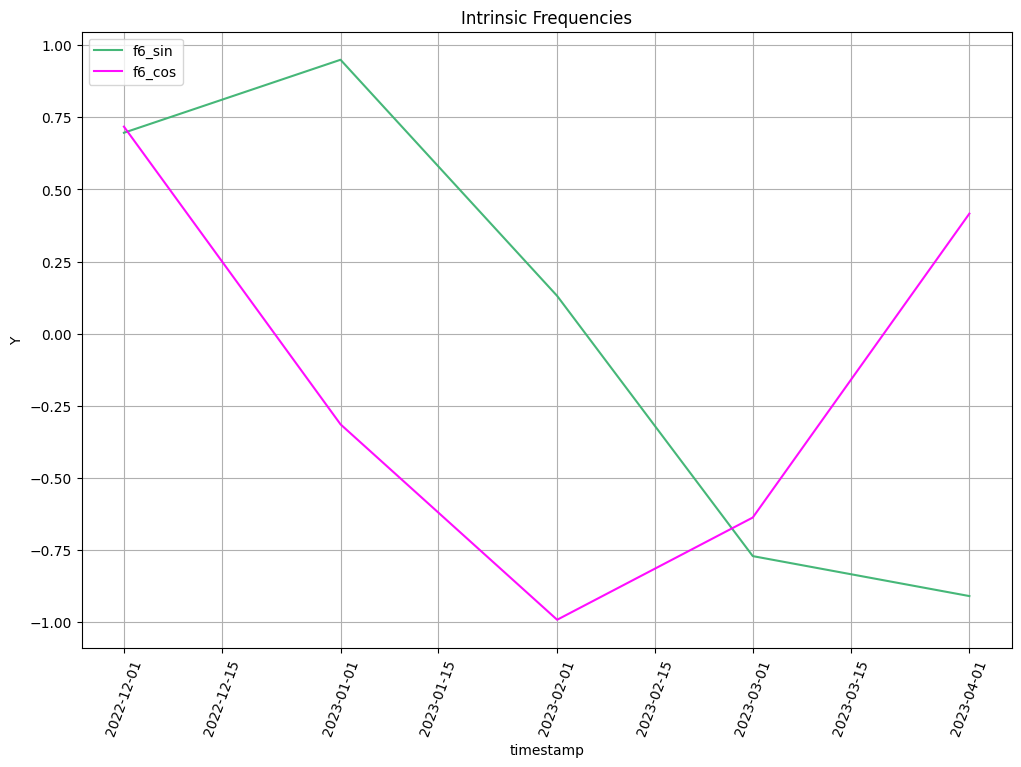

In [38]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f6_sin'], 'lab': 'f6_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f6_cos'], 'lab': 'f6_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



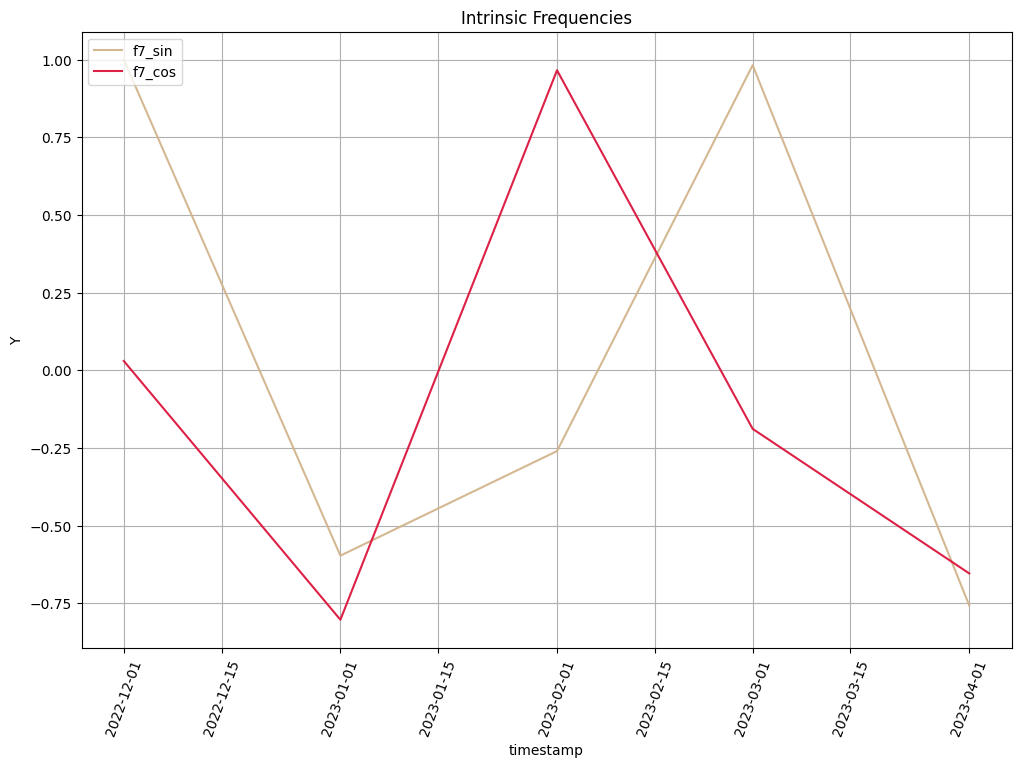

In [39]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f7_sin'], 'lab': 'f7_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f7_cos'], 'lab': 'f7_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

Variable X from 1-th dictionary successfully converted to datetime64[ns].

2 valid series input.



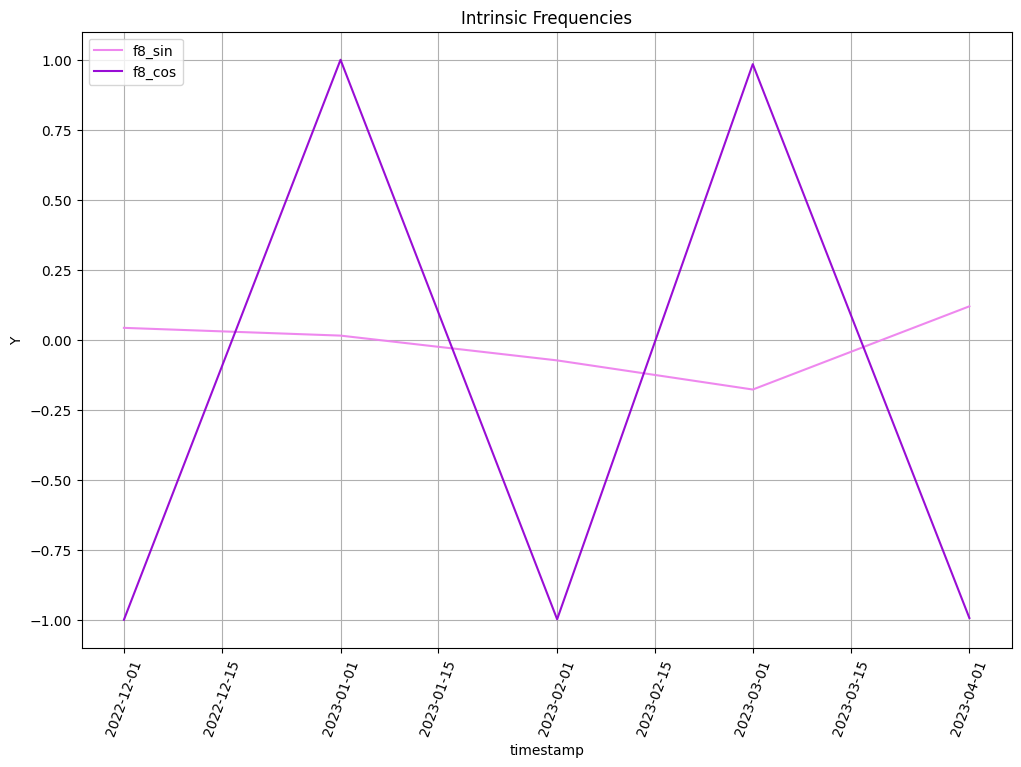

In [42]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS.
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results',
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'x': prediction_output['timestamp'], 'y': prediction_output['f8_sin'], 'lab': 'f8_sin'},
    {'x': prediction_output['timestamp'], 'y': prediction_output['f8_cos'], 'lab': 'f8_cos'},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None},
    {'x': None, 'y': None, 'lab': None}

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Intrinsic Frequencies' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 2: import only a dictionary or a list

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_or_list_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Dictionary or list saved as imported_dict_or_list.
# Simply modify this object on the left of equality:
imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 3: import a model and a dictionary (or a list)

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_and_dict'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model. Dictionary or list saved as imported_dict_or_list.
# Simply modify these objects on the left of equality:
model, imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

#### Case 4: export a model and/or a dictionary (or a list)

In [20]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will
#  be manipulated.

MODEL_FILE_NAME = 'xgb_model'
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.

MODEL_TYPE = 'xgb_regressor'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .keras
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = xgb_model
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None,
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.

# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)

XGBoost model successfully exported as xgb_model.json.
Export of files completed.


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [21]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = prediction_output
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "xgb_preds"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe xgb_preds exported as CSV file to notebook's workspace as 'xgb_preds.csv'.


In [22]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = feature_importance_xgb
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "feature_importance_xgb"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe feature_importance_xgb exported as CSV file to notebook's workspace as 'feature_importance_xgb.csv'.


## **Exporting dataframes as Excel file tables**

In [ ]:
## WARNING: all files exported from this function are .xlsx

FILE_NAME_WITHOUT_EXTENSION = "datasets"
# (string, in quotes): input the name of the
# file without the extension. e.g. new_file_name_without_extension = "my_file"
# will export a file 'my_file.xlsx' to notebook's workspace.

EXPORTED_TABLES = [{'dataframe_obj_to_be_exported': None,
                    'excel_sheet_name': None},]

# exported_tables is a list of dictionaries. User may declare several dictionaries,
# as long as the keys are always the same, and if the values stored in keys are not None.

# key 'dataframe_obj_to_be_exported': dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: dataframe_obj_to_be_exported = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

# key 'excel_sheet_name': string containing the name of the sheet to be written on the
# exported Excel file. Example: excel_sheet_name = 'tab_1' will save the dataframe in the
# sheet 'tab_1' from the file named as file_name_without_extension.

# examples: exported_tables = [{'dataframe_obj_to_be_exported': dataset1,
# 'excel_sheet_name': 'sheet1'},]
# will export only dataset1 as 'sheet1';
# exported_tables = [{'dataframe_obj_to_be_exported': dataset1, 'excel_sheet_name': 'sheet1'},
# {'dataframe_obj_to_be_exported': dataset2, 'excel_sheet_name': 'sheet2']
# will export dataset1 as 'sheet1' and dataset2 as 'sheet2'.

# Notice that if the file does not contain the exported sheets, they will be created. If it has,
# the sheets will be replaced.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None


export_pd_dataframe_as_excel (file_name_without_extension = FILE_NAME_WITHOUT_EXTENSION, exported_tables = EXPORTED_TABLES, file_directory_path = FILE_DIRECTORY_PATH)

****